In [1]:
import sys
import lightgbm as lgb
sys.path.append('../')
from data import create_training_data, create_evaluation_data
from pipeline import run_model_training, run_hyperparameter_tuning, run_model_training_quick, run_predictions

In [2]:
df = create_training_data("2020-21")
eval_df = create_evaluation_data()

create training data version 1.0 stable
test data version 0.1 stable


In [ ]:
best_hyperparams = run_hyperparameter_tuning(df)

In [3]:
import pickle
params = pickle.load(open("parameters_2021_12_09_14_57.pkl",'rb'))

In [4]:
params

{'n_estimators': 10000,
 'learning_rate': 0.03273211506695059,
 'num_leaves': 2320,
 'max_depth': 7,
 'min_data_in_leaf': 200,
 'max_bin': 297,
 'lambda_l1': 15,
 'lambda_l2': 80,
 'min_gain_to_split': 3.3761412871059924,
 'bagging_fraction': 0.4,
 'bagging_freq': 1,
 'feature_fraction': 0.6000000000000001}

In [4]:
model = run_model_training(params, df)

C:\Users\magnu\AppData\Local\Programs\Python\Python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 21916, number of used features: 5
[LightGBM] [Info] Start training from score 1.283035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's l2: 5.73583	valid_1's l2: 6.28705
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's l2: 5.46843	valid_1's l2: 6.00597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's l2: 5.28799	valid_1's l2: 5.81325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's l2: 5.04439	valid_1's l2: 5.55293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training's l2: 4.886

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

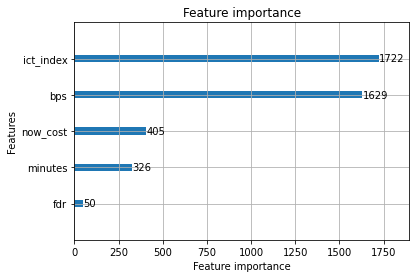

In [5]:
lgb.plot_importance(model[0])

In [7]:
preds = run_predictions(eval_df, "model_2021_12_09_15_24.pkl")

In [8]:
preds.head(n = 30)

,name,ict_index,bps,minutes,now_cost,fdr,predicted_points
255,Vardy,26.4,76,350,104,3,12.099759
3,Aubameyang,18.7,35,177,99,2,12.095725
316,Mané,39.2,40,270,119,2,12.095725
319,Salah,42.8,81,270,125,2,12.095725
343,Mahrez,23.0,58,122,89,2,12.030860
479,Son,24.7,63,248,100,4,12.018519
388,Ronaldo,17.8,57,90,125,4,12.018519
186,Lukaku,39.3,97,270,115,4,12.018519
370,Fernandes,42.8,105,354,120,4,12.018519
142,Wood,21.8,35,254,69,3,11.926539
